In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [3]:
#import labelled data
df = pd.read_csv("data-performance.csv")
#show data summary
#print(df.shape)
#print(df.head())

#gender-code using 0 (male) and 1 (female)
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
#extract class labels from dataframe
class_label = df.iloc[:,-1].to_numpy()
df_features = df.iloc[:,:-1]
#print(class_label)
#print(df_features.shape)

#check for missing values
missing_values_count = df.isnull().sum()
#print(missing_values_count)

#print summary statistic table
summary_stats = df_features.describe()
summary_stats = summary_stats.transpose()
summary_stats['variance'] = df_features.var()  # Variance
summary_stats = summary_stats[['mean', 'std', 'variance', 'min', 'max']]

print(summary_stats)

                               mean        std     variance    min    max
age                       37.065300  13.702759   187.765612   21.0   64.0
gender                     0.351600   0.477494     0.228000    0.0    1.0
height_cm                168.790510   8.552227    73.140581  125.0  193.8
weight_kg                 68.255130  12.215114   149.209021   26.3  138.1
body fat_%                23.898855   7.341047    53.890971    3.5   54.9
diastolic                 79.031270  10.788006   116.381077    0.0  156.2
systolic                 130.418290  14.715057   216.532908    0.0  195.0
gripForce                 36.558095  10.546037   111.218901    0.0   70.5
sit and bend forward_cm   13.641773   8.552370    73.143029  -25.0  213.0
sit-ups counts            37.807200  14.447798   208.738854    0.0   80.0
broad jump_cm            187.144200  40.206157  1616.535060    0.0  303.0


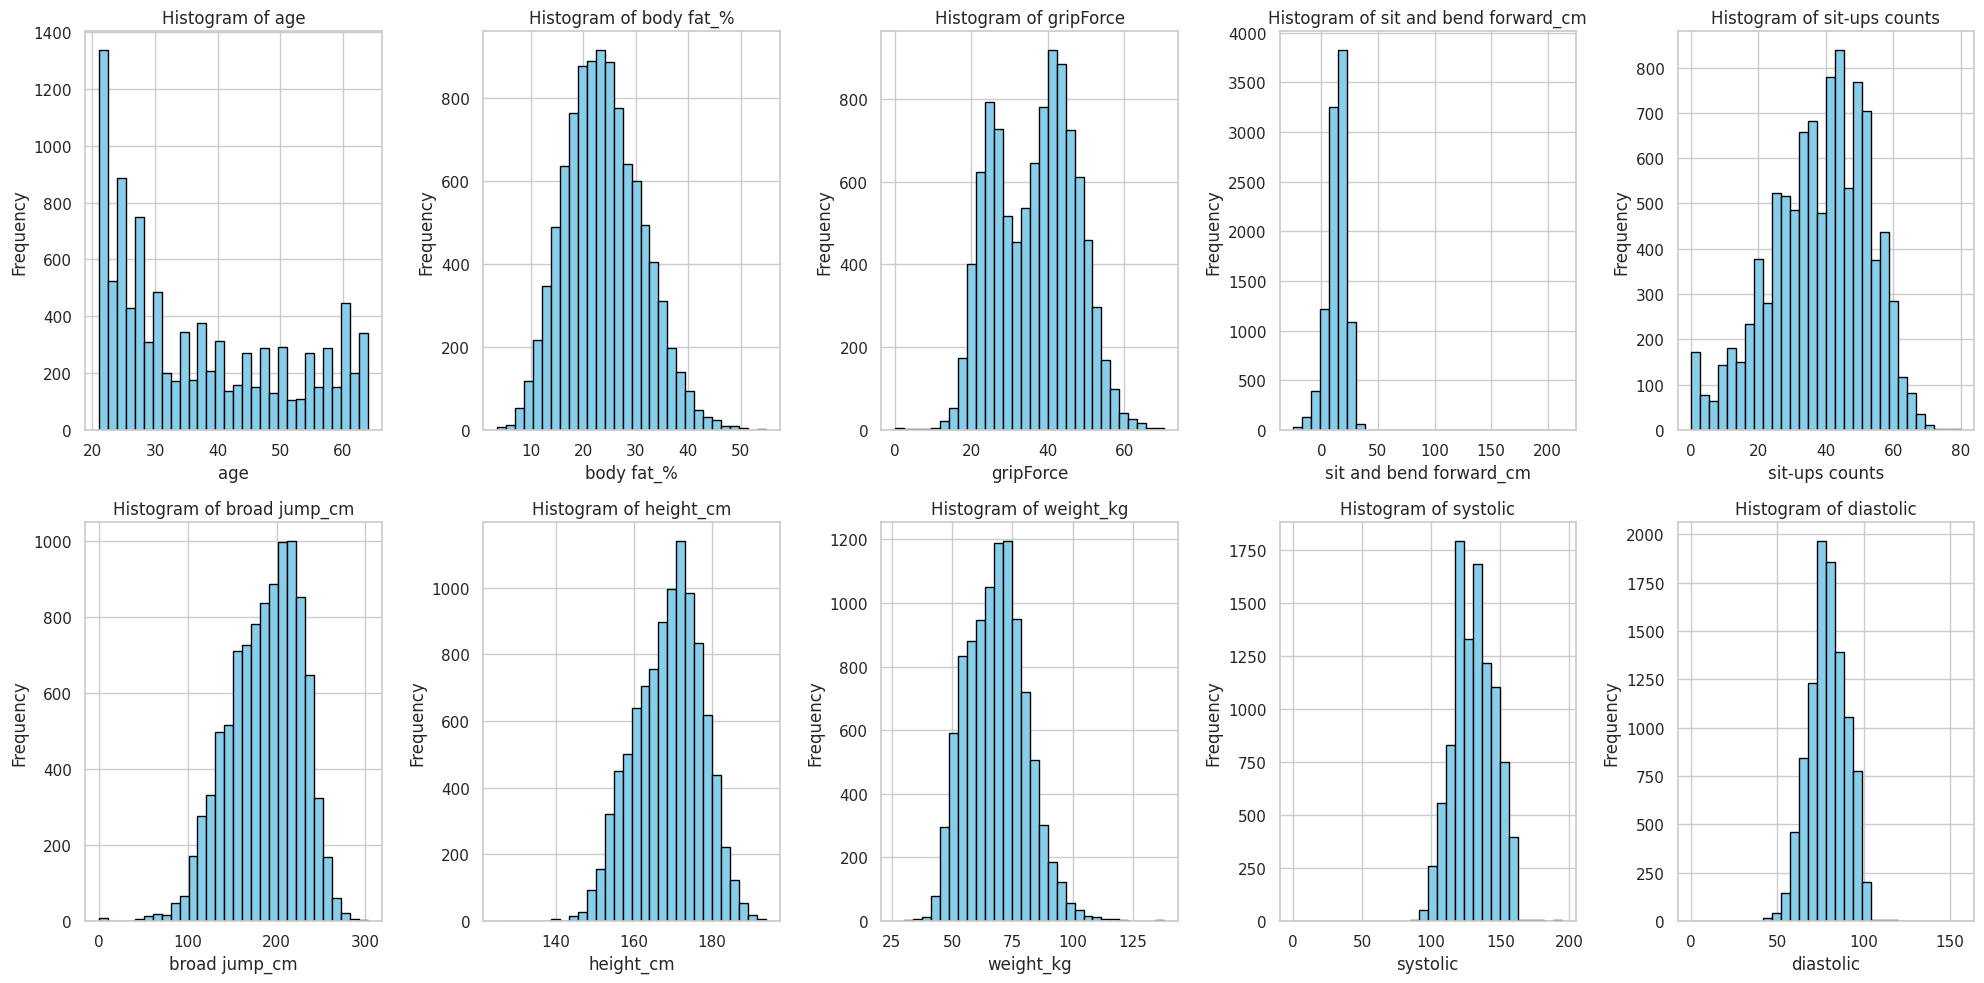

In [4]:
#add more summarative features
df_features['BMI'] = df_features['weight_kg'] / (df_features['height_cm']/100) ** 2
df_features['pulse_pressure'] = df_features['systolic'] - df_features['diastolic']
df_features['MAP'] = (df_features['systolic'] + 2 * df_features['diastolic']) / 3
df_features.head()
# #binning features into categories can help capture nonlinear effects
# df['age_group'] = pd.cut(df['age'], bins=[0, 18, 65, 100], labels=['Youth', 'Adult', 'Senior'])
# df['body_fat_category'] = pd.cut(df['body fat_%'], bins=[0, 18, 25, 50], labels=['Low', 'Normal', 'High'])

# histogram the four continuous variables
sb.set(style="whitegrid")
features = ['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'height_cm', 'weight_kg', 'systolic', 'diastolic']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for ax, feature in zip(axes, features):
    ax.hist(df_features[feature], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

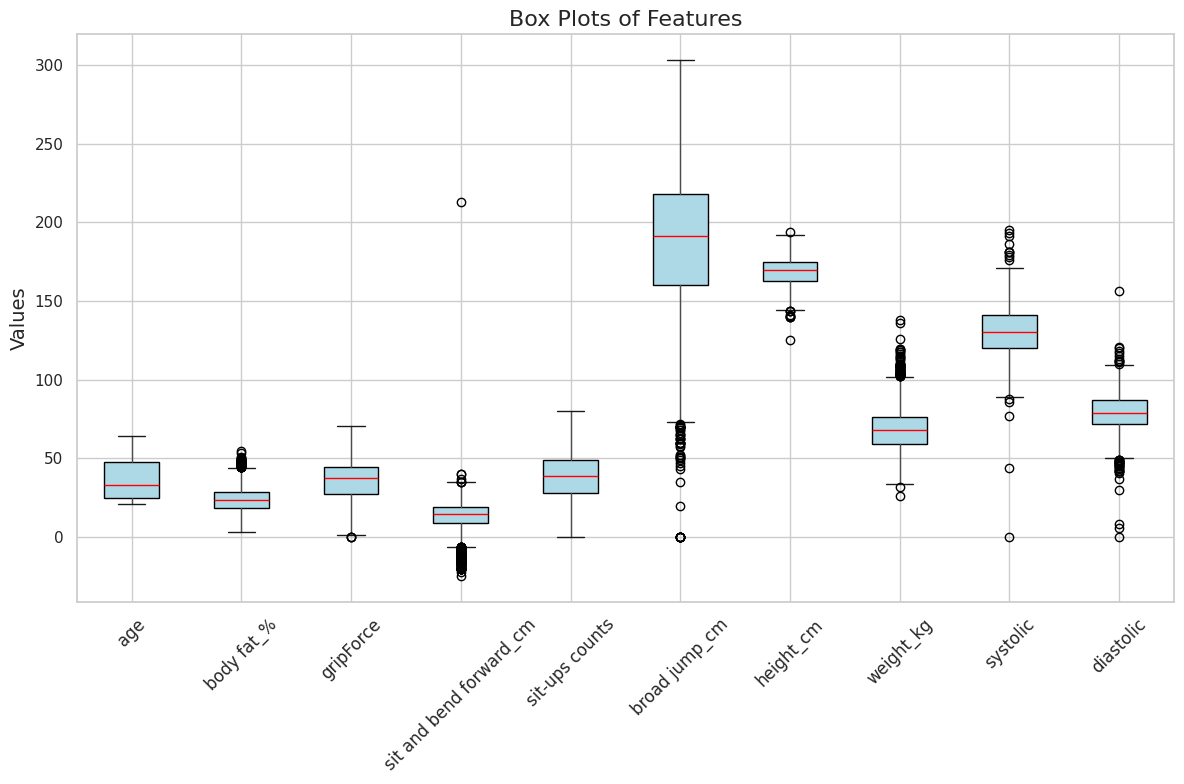

In [5]:

# Setting a background grid for better readability
sb.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
bp = df_features[features].boxplot(ax=ax, patch_artist=True, medianprops={'color': 'red'}, boxprops={'facecolor': 'lightblue'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Box Plots of Features', fontsize=16)
plt.tight_layout()
plt.show()

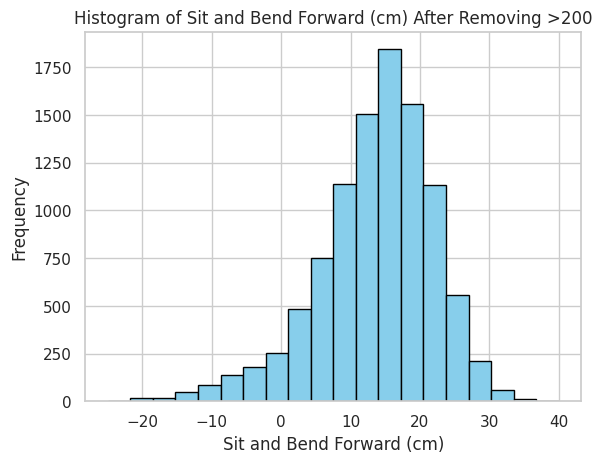

In [6]:
#removing outlier
df_filtered = df[df['sit and bend forward_cm'] <= 200]
df_features_filtered = df_features[df_features['sit and bend forward_cm'] <= 200]


# Create a histogram of the 'sit and bend forward_cm' feature from the filtered DataFrame
plt.hist(df_features_filtered['sit and bend forward_cm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sit and Bend Forward (cm) After Removing >200')
plt.xlabel('Sit and Bend Forward (cm)')
plt.ylabel('Frequency')
plt.show()


(15, 15)


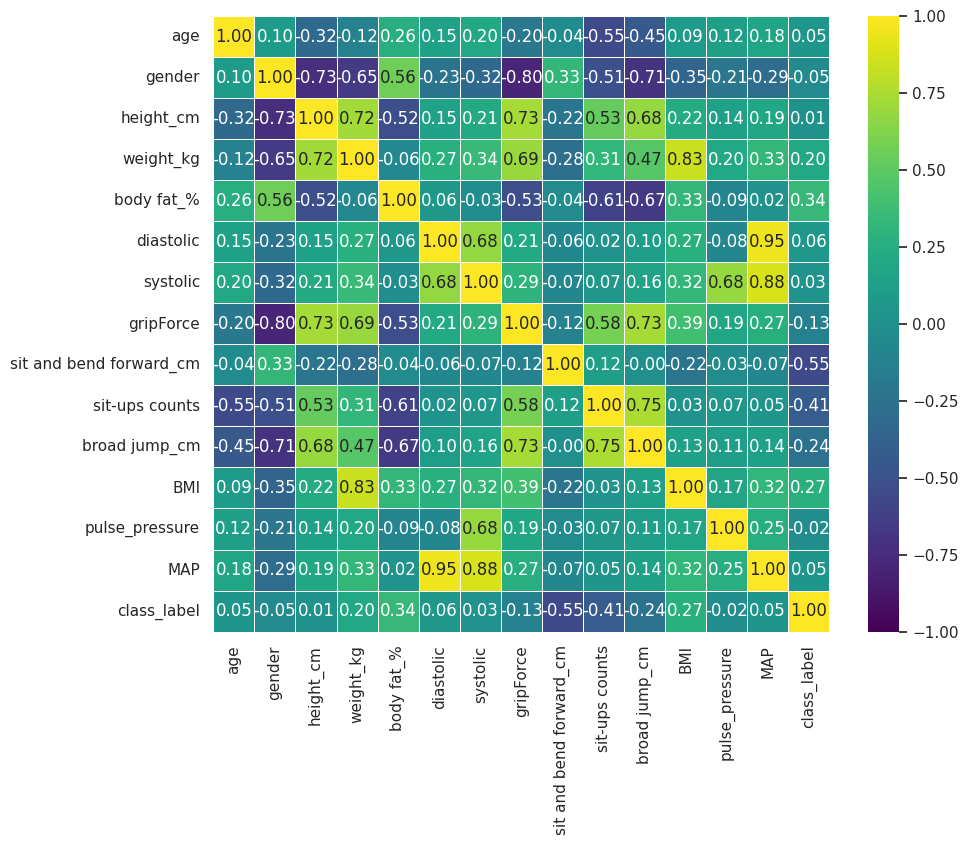

In [7]:
# correlation heatmap
label_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
df_features_filtered = pd.concat([df_features, df_filtered['class']], axis=1, join='inner')
df_features_filtered['class_label'] = df_features_filtered['class'].map(label_mapping)
#display(df_features_filtered)
corr_matrix = df_features_filtered.corr(numeric_only=True)
print(corr_matrix.shape)
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
sb.heatmap(corr_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [8]:
df_features_filtered = df_features_filtered.replace([float('inf'), -float('inf')], float('nan'))

<ipython-input-9-9258c268e6a4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
<ipython-input-9-9258c268e6a4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
<ipython-input-9-9258c268e6a4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
<ipython-input-9-9258c268e6a4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
<ipython-input-9-9258c268e6a4>:7: UserWarning: Boolean Series key will be reindexed 

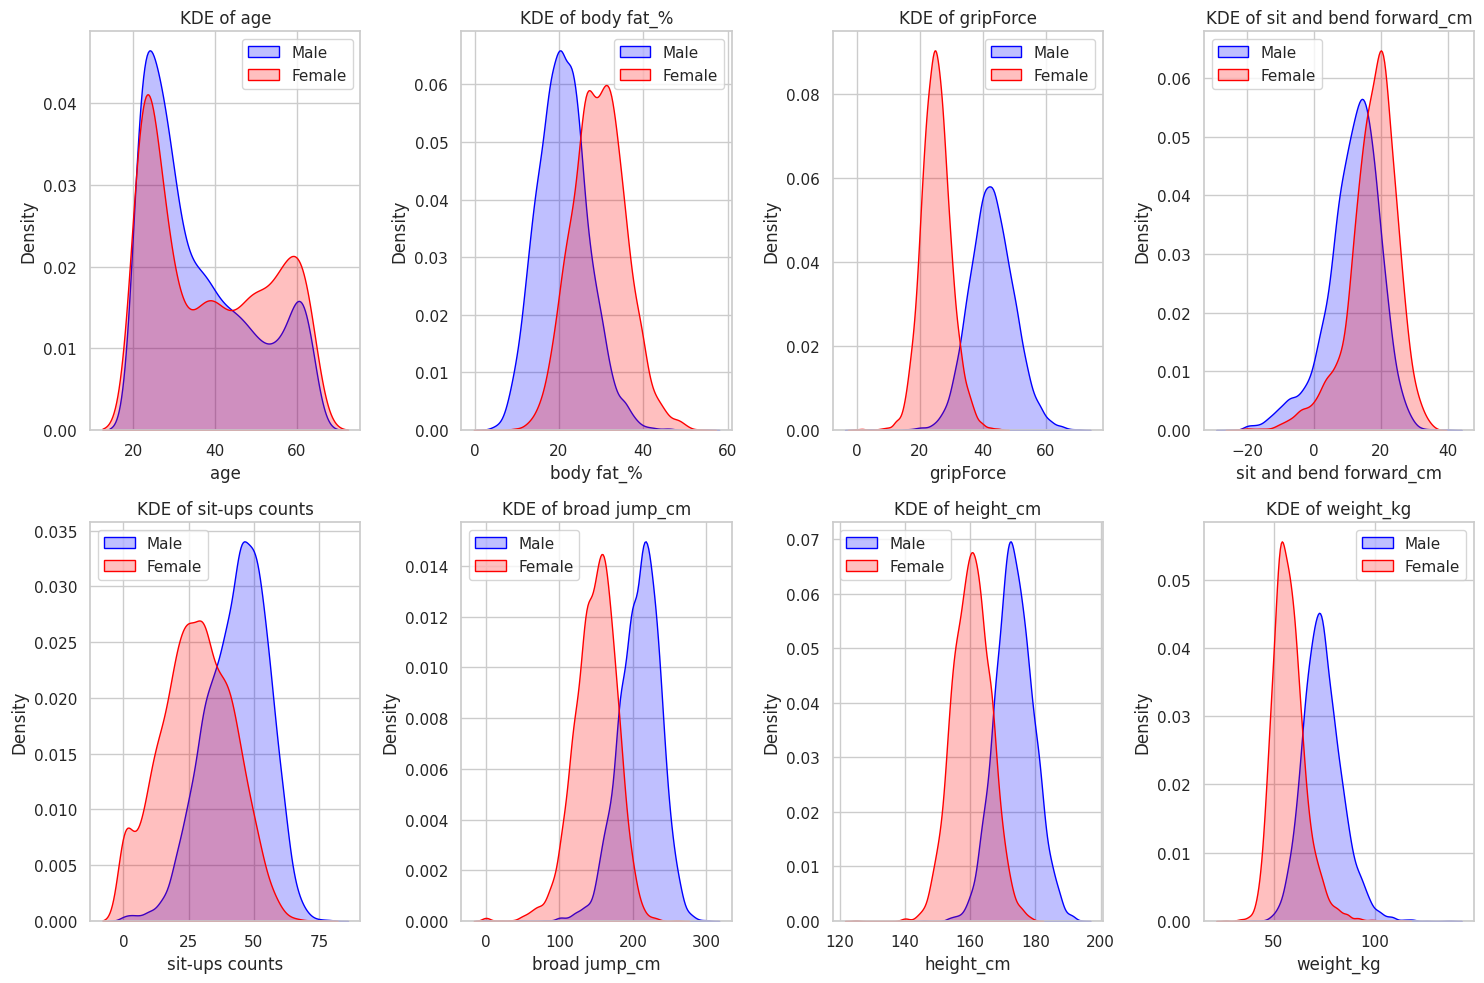

In [9]:
#after plotting the correlation heatmap, first thing I notcie is gender negatively correlates with most features,
# This means I should examine feature correlations separated by gender.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for ax, feature in zip(axes, features):
    sb.kdeplot(df_features_filtered[df_features_filtered['gender'] == 0][feature], ax=ax, color='blue', label='Male', fill=True)
    sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
    ax.set_title(f'KDE of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import ttest_ind
male_df = df_features_filtered[df_features_filtered['gender'] == 0]
female_df = df_features_filtered[df_features_filtered['gender'] == 1]
results = []

# Loop through each column in the DataFrame
for column in df_features_filtered.columns:
    if df_features_filtered[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        # Perform t-test
        t_stat, p_value = ttest_ind(male_df[column].dropna(), female_df[column].dropna(), equal_var=False)  # Welch's t-test

        # Append the results
        results.append({'Feature': column,
                        'T-Statistic': t_stat,
                        'P-Value': p_value})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
display(results_df)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Feature,T-Statistic,P-Value
0,age,-9.387587,8.263266e-21
1,gender,-inf,0.000000e+00
2,height_cm,107.425531,0.000000e+00
3,weight_kg,90.913614,0.000000e+00
4,body fat_%,-65.877719,0.000000e+00
5,diastolic,23.262152,2.463378e-115
6,systolic,33.178241,1.470218e-223
7,gripForce,147.581978,0.000000e+00
8,sit and bend forward_cm,-35.525415,3.564265e-256
9,sit-ups counts,56.453328,0.000000e+00


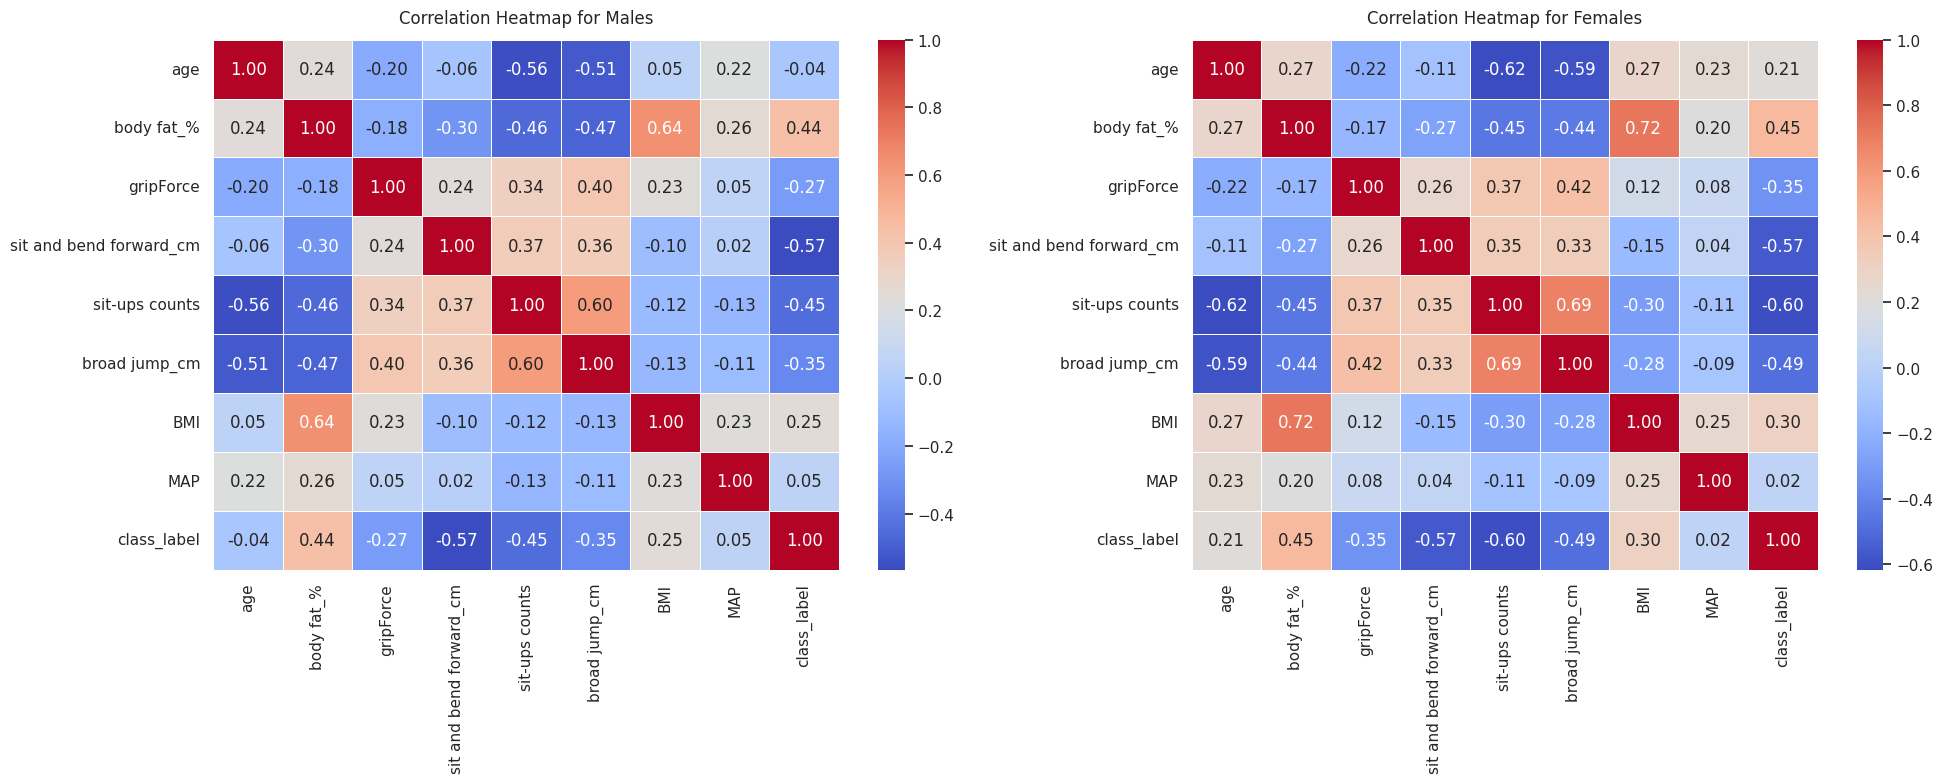

In [11]:
# correlation heatmap
features = ['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'BMI', 'MAP', 'class_label']
male_df = df_features_filtered[df_features_filtered['gender'] == 0]
female_df = df_features_filtered[df_features_filtered['gender'] == 1]
corr_matrix_male = male_df[features].corr()
corr_matrix_female = female_df[features].corr()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# Heatmap for males
heatmap_male = sb.heatmap(corr_matrix_male, annot=True, ax=axes[0], cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap_male.set_title('Correlation Heatmap for Males', fontdict={'fontsize': 12}, pad=12)

# Heatmap for females
heatmap_female = sb.heatmap(corr_matrix_female, annot=True, ax=axes[1], cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap_female.set_title('Correlation Heatmap for Females', fontdict={'fontsize': 12}, pad=12)

# Display the plots
plt.tight_layout()
plt.show()

Feature: gripForce
Correlation before normalization: -0.13131151857840523
Correlation after normalization: -0.29538541058283757


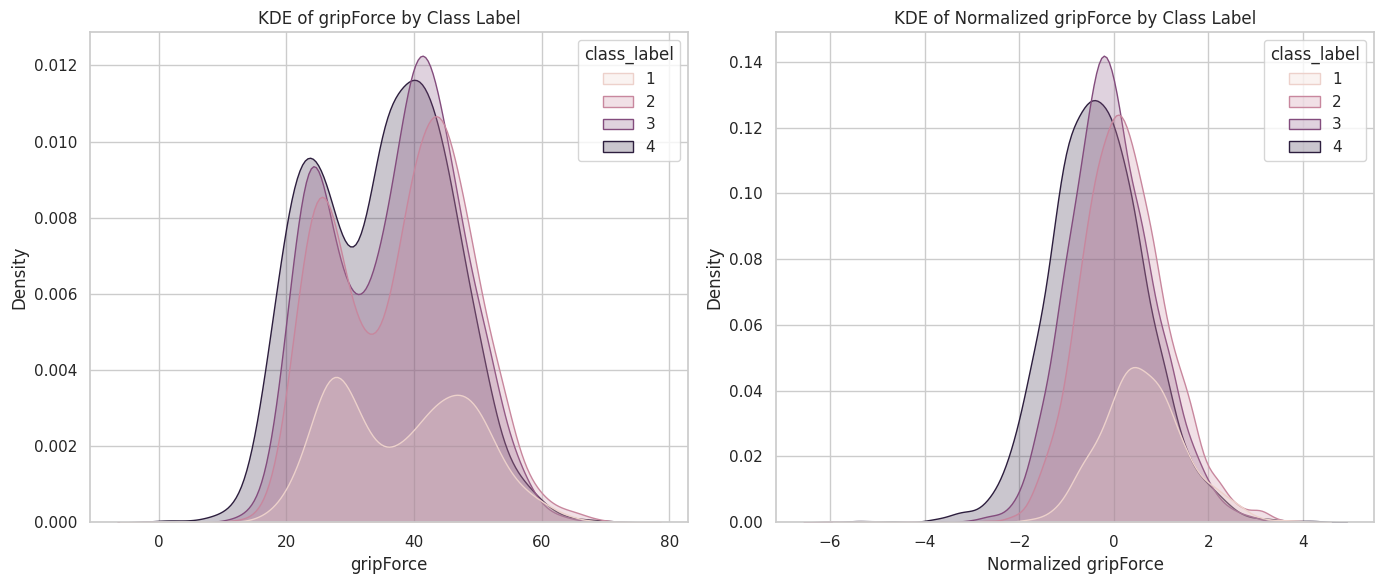

Feature: sit and bend forward_cm
Correlation before normalization: -0.5489277612338274
Correlation after normalization: -0.5649561759198363


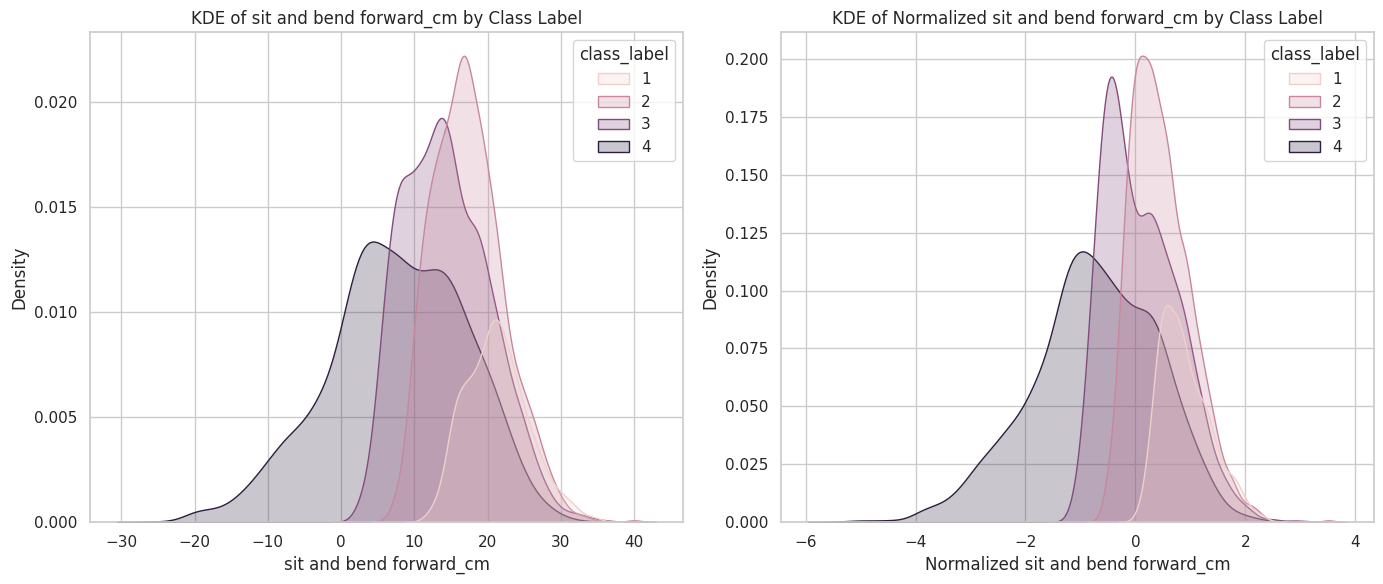

Feature: sit-ups counts
Correlation before normalization: -0.41435578688416996
Correlation after normalization: -0.5051760046097291


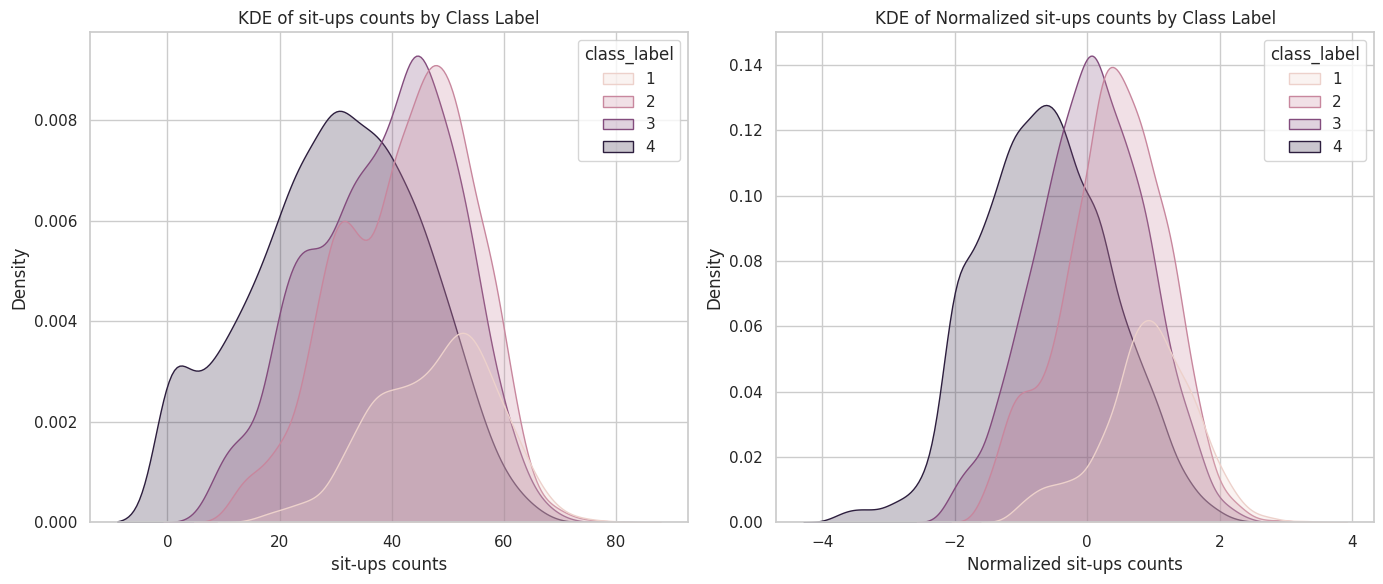

Feature: broad jump_cm
Correlation before normalization: -0.24491874699830857
Correlation after normalization: -0.39712098804743906


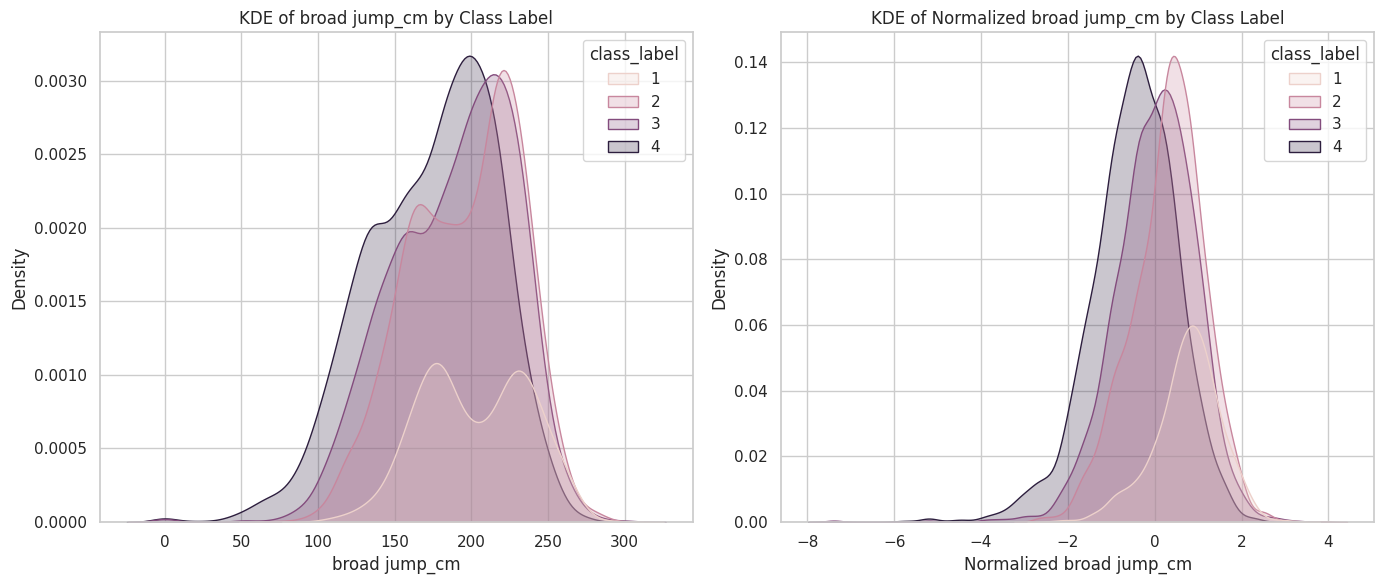

In [12]:
from scipy.stats import pearsonr
features = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for feature in features:
    # Calculate the Pearson correlation before normalization
    cor_before = pearsonr(df_features_filtered[feature], df_features_filtered['class_label'])[0]

    # Normalize the feature within each gender group
    df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(
        lambda x: (x - x.mean()) / x.std())

    # Calculate the Pearson correlation after normalization
    cor_after = pearsonr(df_features_filtered[feature + '_normalized'], df_features_filtered['class_label'])[0]

    # Output the correlation results
    print(f"Feature: {feature}")
    print(f"Correlation before normalization: {cor_before}")
    print(f"Correlation after normalization: {cor_after}")

    # Setup figure and axes for the KDE plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Original feature KDE plot
    sb.kdeplot(data=df_features_filtered, x=feature, hue='class_label', ax=axes[0], fill=True)
    axes[0].set_title(f'KDE of {feature} by Class Label')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')

    # Normalized feature KDE plot
    sb.kdeplot(data=df_features_filtered, x=feature + '_normalized', hue='class_label', ax=axes[1], fill=True)
    axes[1].set_title(f'KDE of Normalized {feature} by Class Label')
    axes[1].set_xlabel('Normalized ' + feature)
    axes[1].set_ylabel('Density')

    # Display the plot
    plt.tight_layout()
    plt.show()

Correlation of BMI with class label: 0.26850128642863264
Correlation of BMI with class label: 0.33876685084335906
Correlation of BMI_BodyFat_Interaction with class label: 0.3811097895868646


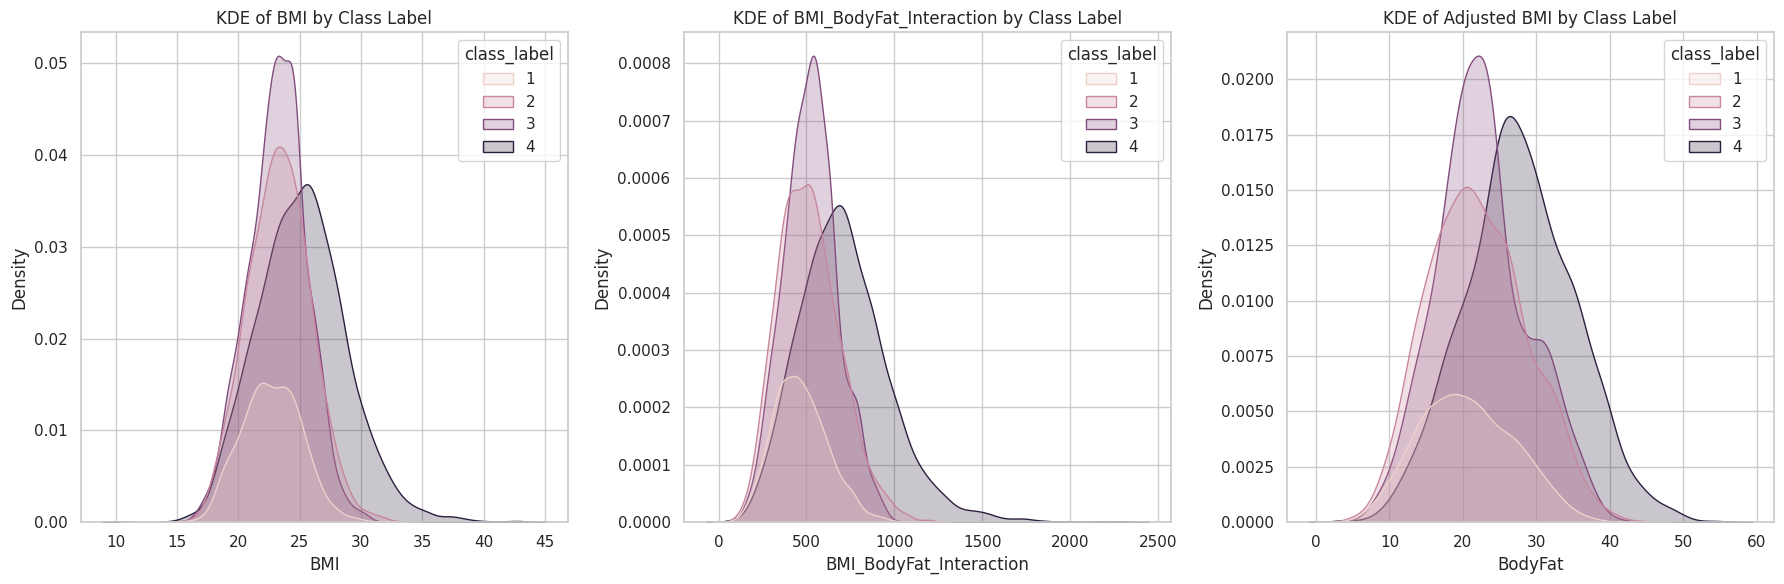

In [13]:
df_features_filtered['BMI_BodyFat_Interaction'] = df_features_filtered['BMI'] * df_features_filtered['body fat_%']

cor_BMI = pearsonr(df_features_filtered['BMI'], df_features_filtered['class_label'])[0]
cor_BodyFat = pearsonr(df_features_filtered['body fat_%'], df_features_filtered['class_label'])[0]
cor_BMI_BodyFat_Interaction = pearsonr(df_features_filtered['BMI_BodyFat_Interaction'], df_features_filtered['class_label'])[0]

print(f"Correlation of BMI with class label: {cor_BMI}")
print(f"Correlation of BMI with class label: {cor_BodyFat}")
print(f"Correlation of BMI_BodyFat_Interaction with class label: {cor_BMI_BodyFat_Interaction}")


# Setup figure for KDE plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# KDE plot for original BMI
sb.kdeplot(data=df_features_filtered, x='BMI', hue='class_label', ax=axes[0], fill=True)
axes[0].set_title('KDE of BMI by Class Label')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')

# KDE plot for BMI_BodyFat_Interaction
sb.kdeplot(data=df_features_filtered, x='BMI_BodyFat_Interaction', hue='class_label', ax=axes[1], fill=True)
axes[1].set_title('KDE of BMI_BodyFat_Interaction by Class Label')
axes[1].set_xlabel('BMI_BodyFat_Interaction')
axes[1].set_ylabel('Density')

# KDE plot for Adjusted BMI
sb.kdeplot(data=df_features_filtered, x='body fat_%', hue='class_label', ax=axes[2], fill=True)
axes[2].set_title('KDE of Adjusted BMI by Class Label')
axes[2].set_xlabel('BodyFat')
axes[2].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
selected_features = [
    "gender",
    "age",
    'gripForce_normalized',
    'sit-ups counts_normalized',
    'sit and bend forward_cm_normalized',
    'broad jump_cm_normalized',
    'body fat_%',
    "BMI",
    "MAP",
    "class_label"
]
df_selected = df_features_filtered[selected_features]
df_selected

,gender,age,gripForce_normalized,sit-ups counts_normalized,sit and bend forward_cm_normalized,broad jump_cm_normalized,body fat_%,BMI,MAP,class_label
0,1,61.0,0.092541,-0.351432,0.628008,-0.643677,23.6,21.054927,94.000000,1
1,1,56.0,-0.055774,-0.424404,-0.043410,-0.573627,32.0,23.391803,102.000000,2
2,1,40.0,-0.246466,0.305316,0.332584,0.652244,30.0,23.467348,97.333333,4
3,1,59.0,0.007789,-0.351432,0.520581,-0.468552,29.5,21.824807,106.000000,2
4,0,45.0,-0.664315,-0.703517,-1.773269,-1.283131,20.6,26.454950,98.000000,4
...,...,...,...,...,...,...,...,...,...,...
9995,1,36.0,1.151938,1.326923,-0.714828,1.492841,28.0,21.921195,66.000000,3
9996,0,35.0,-0.369854,0.237528,0.258365,-1.708947,18.0,25.780664,107.000000,4
9997,0,32.0,0.611681,-2.072310,-0.769840,0.065288,18.0,23.794816,95.666667,4
9998,0,45.0,-0.986820,-0.874617,-2.764310,-0.254074,26.1,29.587069,94.666667,4


In [15]:
X = df_selected.iloc[:,0:9].to_numpy()
y = df_selected.iloc[:,-1].to_numpy()
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


(9999, 9)
(9999,)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# code adapted from https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('logistic_Reg', LogisticRegression(max_iter=10000))
])

C = [0.1, 1, 10, 100]  # Regularization strength

penalty = ['l2']  # Types of penalties (Note: 'l1' requires 'saga' solver)

parameters = {
    'logistic_Reg__C': C,
    'logistic_Reg__penalty': penalty,
    'logistic_Reg__solver': ['lbfgs', 'saga', "newton-cg", "sag"]
}

clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold)
clf_GS.fit(X, y)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Solver:', clf_GS.best_estimator_.get_params()['logistic_Reg__solver'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

# Calculate and print accuracy on the training and test sets
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))

Best Penalty: l2
Best C: 10
Best Solver: lbfgs
LogisticRegression(C=10, max_iter=10000)
Accuracy on training set: 0.601
Accuracy on test set: 0.612


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf_GS.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48       254
           2       0.49      0.54      0.51       673
           3       0.54      0.56      0.55       749
           4       0.79      0.79      0.79       824

    accuracy                           0.61      2500
   macro avg       0.61      0.57      0.58      2500
weighted avg       0.62      0.61      0.61      2500



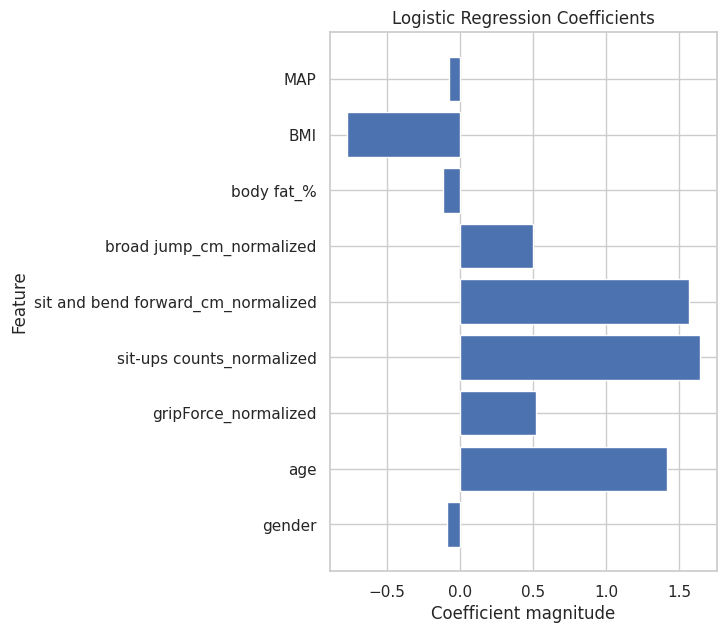

In [20]:
feature_names = df_selected.columns[:9]
best_model = clf_GS.best_estimator_.named_steps['logistic_Reg']
def plot_logistic_coefficients(model, feature_names):
    n_features = model.coef_.shape[1]
    plt.figure(figsize=(5, 7))
    plt.barh(range(n_features), model.coef_[0], align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient magnitude")
    plt.ylabel("Feature")
    plt.title("Logistic Regression Coefficients")
    #save as pdf
    output_file = "logistic_coefficients.pdf"
    plt.savefig(output_file, format='pdf', bbox_inches='tight')
    plt.show()

# Assuming best_model is your fitted Logistic Regression model
# and feature_names contains the corresponding feature names
plot_logistic_coefficients(best_model, feature_names)


param_logistic_Reg__solver    lbfgs  newton-cg      sag     saga
param_logistic_Reg__C                                           
0.1                         0.60106    0.60136  0.60136  0.60136
1.0                         0.60216    0.60236  0.60226  0.60226
10.0                        0.60296    0.60286  0.60286  0.60286
100.0                       0.60286    0.60296  0.60296  0.60296


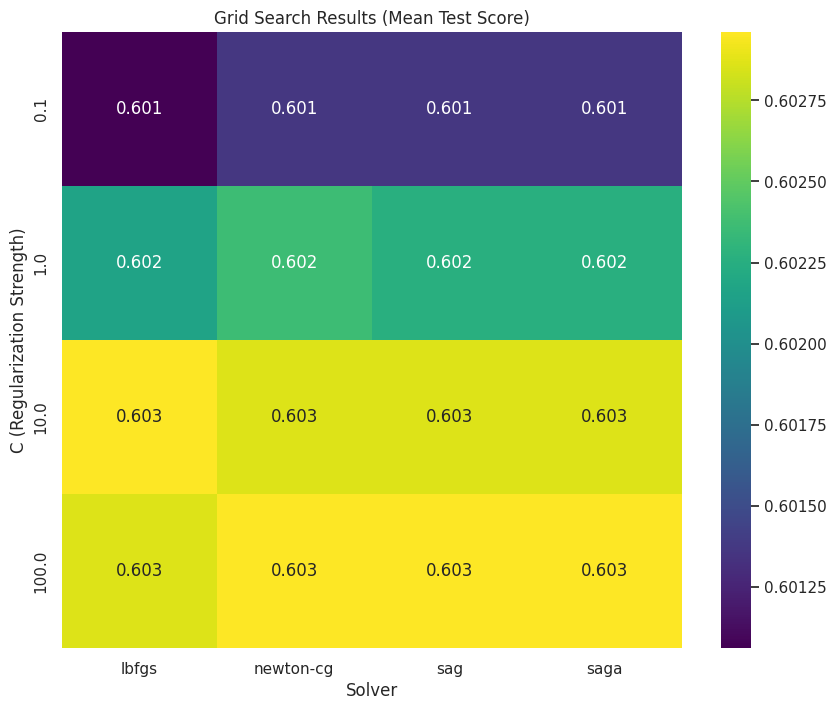

In [23]:
results = pd.DataFrame(clf_GS.cv_results_)

# Pivot table for heatmap (Mean Test Score by C and Solver)
pivot_table = results.pivot(
    index='param_logistic_Reg__C',
    columns='param_logistic_Reg__solver',
    values='mean_test_score'
)
print(pivot_table)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Results (Mean Test Score)")
plt.xlabel("Solver")
plt.ylabel("C (Regularization Strength)")
plt.savefig('heatmap1', format='pdf', bbox_inches='tight')
plt.show()

In [24]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=stratified_kfold, refit = True, verbose = 1, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)
              precision    recall  f1-score   support

           1       0.59      0.49      0.54       254
           2       0.54      0.63      0.58       673
           3       0.61      0.65      0.63       749
           4       0.90      0.76      0.82       824

    accuracy                           0.66      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.68      0.66      0.67      2500



In [30]:
# Calculate and print accuracy on the training and test sets
train_accuracy = grid.best_estimator_.score(X_train, y_train)
test_accuracy = grid.best_estimator_.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))

Accuracy on training set: 0.712
Accuracy on test set: 0.664


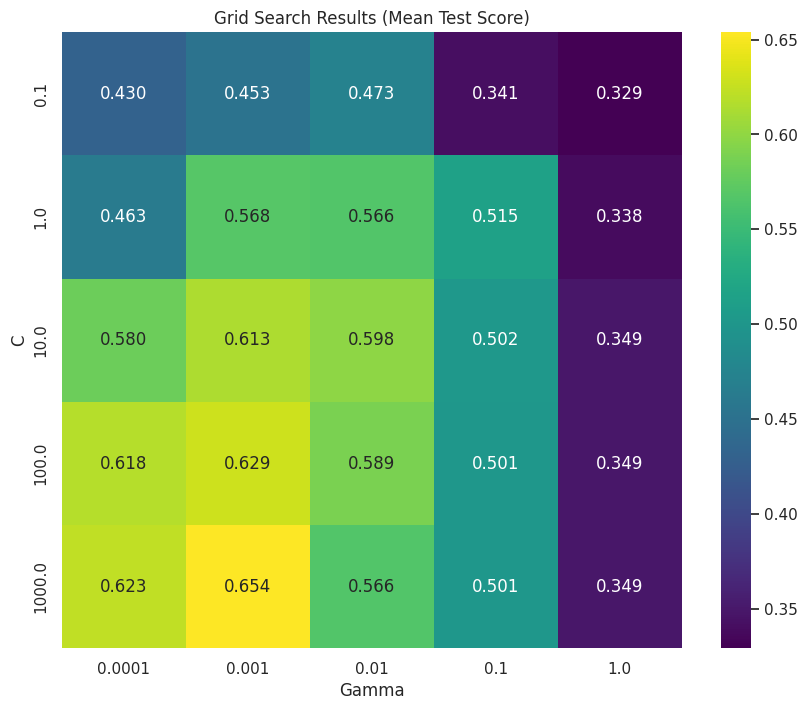

In [25]:
results = pd.DataFrame(grid.cv_results_)
# Pivot table for heatmap (mean test score)
pivot_table = results.pivot_table(
    index="param_C",
    columns="param_gamma",
    values="mean_test_score"
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Results (Mean Test Score)")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.savefig('heatmap2', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
pipe = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])
parameters = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_features': [None],
    'random_forest__max_depth': [None, 10, 20, 30]
}


clf_GS1 = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='f1_micro', verbose=1, n_jobs=-1)

clf_GS1.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best n_estimators:', clf_GS1.best_estimator_.get_params()['random_forest__n_estimators'])
print('Best max_features:', clf_GS1.best_estimator_.get_params()['random_forest__max_features'])
print('Best max_depth:', clf_GS1.best_estimator_.get_params()['random_forest__max_depth'])
print('Best min_samples_split:', clf_GS1.best_estimator_.get_params()['random_forest__min_samples_split'])
print('Best min_samples_leaf:', clf_GS1.best_estimator_.get_params()['random_forest__min_samples_leaf'])
print(clf_GS1.best_estimator_.get_params()['random_forest'])

# Calculate accuracy on the training set
train_accuracy = clf_GS1.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS1.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best n_estimators: 200
Best max_features: None
Best max_depth: 20
Best min_samples_split: 2
Best min_samples_leaf: 1
RandomForestClassifier(max_depth=20, max_features=None, n_estimators=200,
                       random_state=42)
Accuracy on training set: 1.000
Accuracy on test set: 0.726
              precision    recall  f1-score   support

           1       0.59      0.49      0.54       254
           2       0.54      0.63      0.58       673
           3       0.61      0.65      0.63       749
           4       0.90      0.76      0.82       824

    accuracy                           0.66      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.68      0.66      0.67      2500



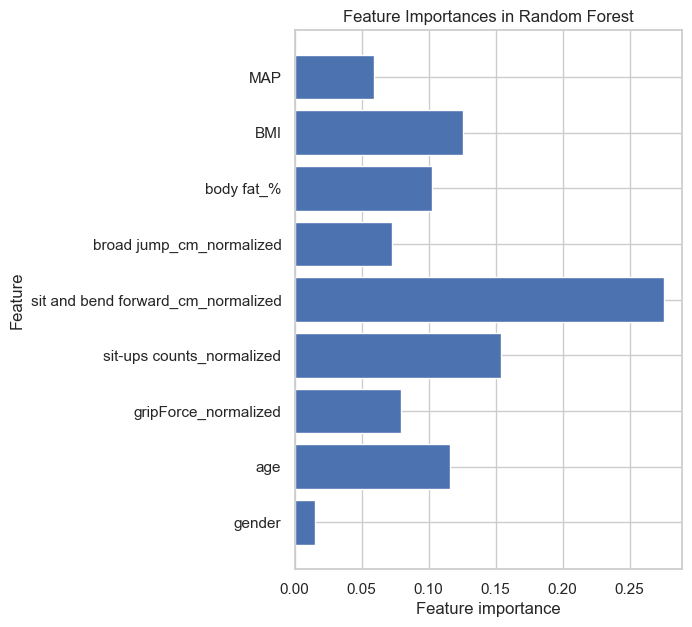

In [ ]:
forest = clf_GS1.best_estimator_.named_steps['random_forest']
def plot_feature_importances(model, feature_names):
    """
    Plots the feature importances of a Random Forest model.

    Parameters:
    - model: The Random Forest model.
    - feature_names: A list of feature names corresponding to the model's features.
    """
    n_features = model.feature_importances_.shape[0]
    plt.figure(figsize=(5, 7))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances in Random Forest")
    plt.show()

# Assuming 'feature_names' contains the names of features used in the model
feature_names = df_selected.columns[:9]  # Update accordingly if different
plot_feature_importances(forest, feature_names)

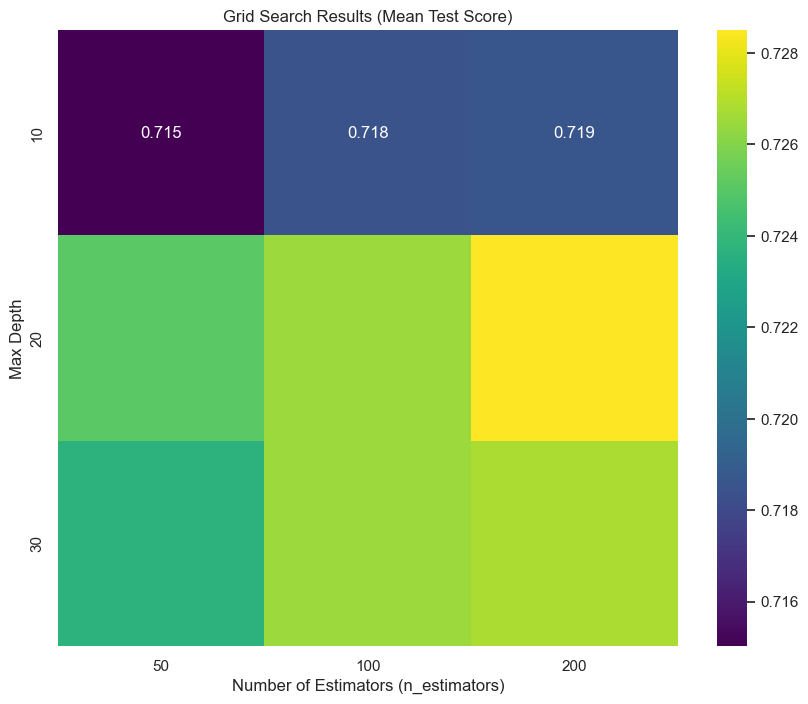

In [ ]:
result = pd.DataFrame(clf_GS1.cv_results_)

# Pivot table for heatmap
# Here, we'll visualize the mean test score against 'n_estimators' and 'max_depth' for simplicity
pivot_table = result.pivot_table(
    index='param_random_forest__max_depth',
    columns='param_random_forest__n_estimators',
    values='mean_test_score'
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Results (Mean Test Score)")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Max Depth")
plt.savefig('heatmap3', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
pipe = Pipeline([
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
])

parameters = {
    'gradient_boosting__n_estimators': [50, 100, 200, 300],
    'gradient_boosting__learning_rate': [0.01, 0.1, 0.2],
    'gradient_boosting__max_depth': [3, 5],
    'gradient_boosting__max_features': ['sqrt', 'log2']
}

clf_GS2 = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='f1_micro', verbose=1, n_jobs=-1)

clf_GS2.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best n_estimators:', clf_GS2.best_estimator_.get_params()['gradient_boosting__n_estimators'])
print('Best learning_rate:', clf_GS2.best_estimator_.get_params()['gradient_boosting__learning_rate'])
print('Best max_depth:', clf_GS2.best_estimator_.get_params()['gradient_boosting__max_depth'])
print('Best min_samples_split:', clf_GS2.best_estimator_.get_params()['gradient_boosting__min_samples_split'])
print('Best min_samples_leaf:', clf_GS2.best_estimator_.get_params()['gradient_boosting__min_samples_leaf'])
print('Best max_features:', clf_GS2.best_estimator_.get_params()['gradient_boosting__max_features'])

print(clf_GS2.best_estimator_.get_params()['gradient_boosting'])

# Calculate accuracy on the training set
train_accuracy = clf_GS2.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS2.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best n_estimators: 100
Best learning_rate: 0.1
Best max_depth: 5
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: sqrt
GradientBoostingClassifier(max_depth=5, max_features='sqrt', random_state=42)
Accuracy on training set: 0.883
Accuracy on test set: 0.732
              precision    recall  f1-score   support

           1       0.59      0.49      0.54       254
           2       0.54      0.63      0.58       673
           3       0.61      0.65      0.63       749
           4       0.90      0.76      0.82       824

    accuracy                           0.66      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.68      0.66      0.67      2500



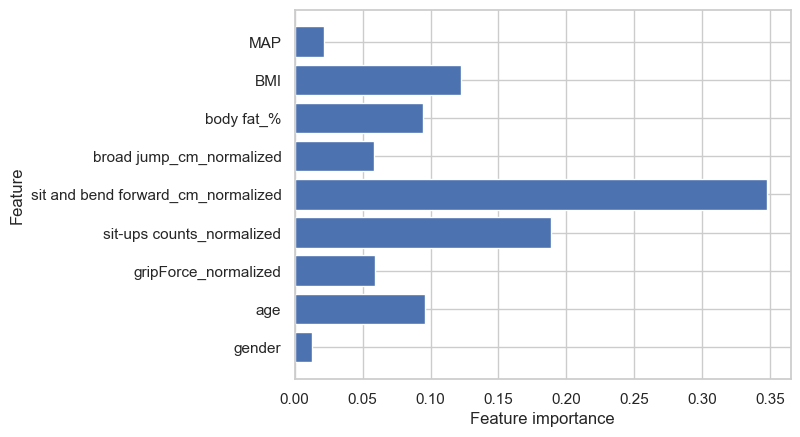

In [ ]:
gbrt = clf_GS2.best_estimator_.named_steps['gradient_boosting']

var_names = selected_features[:-1]

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), var_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(gbrt)

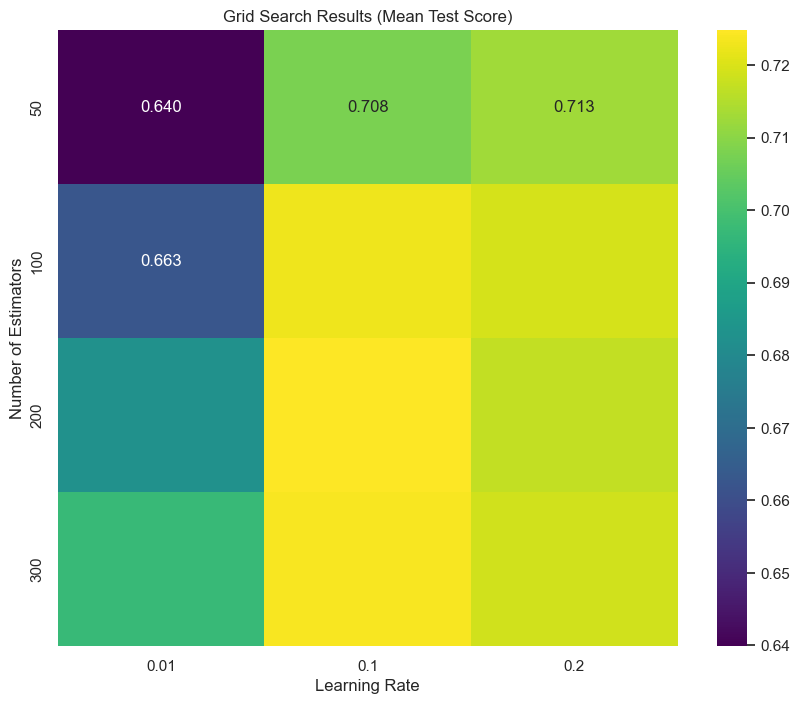

In [ ]:
results = pd.DataFrame(clf_GS2.cv_results_)
pivot_table = results.pivot_table(
    index='param_gradient_boosting__n_estimators',
    columns='param_gradient_boosting__learning_rate',
    values='mean_test_score'
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Results (Mean Test Score)")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Estimators")
plt.savefig('heatmap4', format='pdf', bbox_inches='tight')
plt.show()

In [26]:
pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])
parameters = {
    'mlp__hidden_layer_sizes': [(50, 50), (100, 100)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [0.001, 0.01, 0.1],  # Regularization term
    'mlp__learning_rate_init': [0.001, 0.01]  # Initial learning rate
}

clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='f1_micro', verbose=1, n_jobs=-1)

clf_GS.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best hidden_layer_sizes:', clf_GS.best_estimator_.get_params()['mlp__hidden_layer_sizes'])
print('Best activation:', clf_GS.best_estimator_.get_params()['mlp__activation'])
print('Best alpha:', clf_GS.best_estimator_.get_params()['mlp__alpha'])
print('Best learning_rate_init:', clf_GS.best_estimator_.get_params()['mlp__learning_rate_init'])
print()
print(clf_GS.best_estimator_.get_params()['mlp'])

# Calculate accuracy on the training set
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

mlp = clf_GS.best_estimator_.named_steps['mlp']

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hidden_layer_sizes: (50, 50)
Best activation: relu
Best alpha: 0.1
Best learning_rate_init: 0.01

MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
              max_iter=1000, random_state=42)
Accuracy on training set: 0.787
Accuracy on test set: 0.724
              precision    recall  f1-score   support

           1       0.59      0.49      0.54       254
           2       0.54      0.63      0.58       673
           3       0.61      0.65      0.63       749
           4       0.90      0.76      0.82       824

    accuracy                           0.66      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.68      0.66      0.67      2500



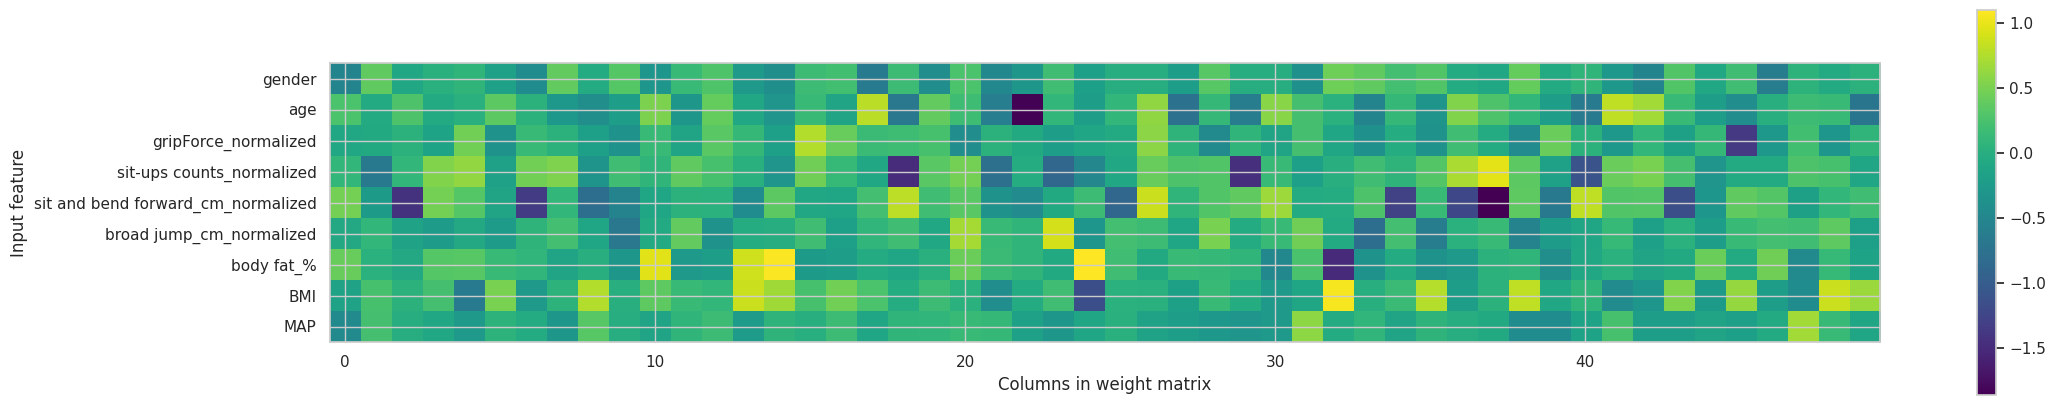

In [29]:
plt.figure(figsize=(25, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
var_names =[ "gender",
    "age",
    'gripForce_normalized',
    'sit-ups counts_normalized',
    'sit and bend forward_cm_normalized',
    'broad jump_cm_normalized',
    'body fat_%',
    "BMI",
    "MAP"]
plt.yticks(range(9), var_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar();
plt.savefig('heatmap5', format='pdf', bbox_inches='tight')

In [31]:
df = pd.read_csv("data-performance-test-unlabelled.csv")
#show data summary
#print(df.shape)
#print(df.head())

#gender-code using 0 (male) and 1 (female)
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

df['BMI'] = df['weight_kg'] / (df['height_cm']/100) ** 2
df['MAP'] = (df['systolic'] + 2 * df['diastolic']) / 3
df.head()

features = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for feature in features:
    # Normalize the feature within each gender group
    df[feature + '_normalized'] = df.groupby('gender')[feature].transform(
        lambda x: (x - x.mean()) / x.std())
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,BMI,MAP,gripForce_normalized,sit and bend forward_cm_normalized,sit-ups counts_normalized,broad jump_cm_normalized
0,36.0,0,177.5,73.1,13.8,82.0,135.0,50.8,19.1,64.0,252.0,23.201746,99.666667,1.711095,0.825044,1.474943,1.122289
1,35.0,0,176.4,77.7,21.2,74.0,129.0,34.0,11.7,41.0,213.0,24.970306,92.333333,-1.679381,-0.213529,-0.337773,-0.279930
2,34.0,1,162.6,52.1,20.4,72.0,115.0,31.3,28.2,65.0,208.0,19.705917,86.333333,1.394124,1.775632,1.505977,1.238003
3,32.0,1,156.3,60.8,38.9,68.0,120.0,25.2,5.3,13.0,90.0,24.887749,85.333333,-0.335535,-0.947268,-1.210005,-1.713196
4,27.0,0,165.4,65.0,24.5,82.0,123.0,36.5,10.2,46.0,179.0,23.759776,95.666667,-1.174846,-0.424050,0.056296,-1.502378
5,24.0,1,162.6,58.9,26.0,74.0,131.0,26.4,14.7,31.0,172.0,22.277898,93.000000,0.004726,0.170429,-0.269857,0.337637
6,64.0,0,168.0,73.0,20.5,84.0,127.0,41.8,12.6,27.0,190.0,25.864512,98.333333,-0.105232,-0.087216,-1.441165,-1.106880
7,25.0,1,158.1,56.3,29.6,60.0,105.0,21.9,6.1,19.0,141.0,22.523955,75.000000,-1.271252,-0.852145,-0.896622,-0.437678
8,22.0,0,179.1,74.7,13.2,71.0,121.0,40.9,21.2,62.0,259.0,23.287852,87.666667,-0.286864,1.119774,1.317315,1.373969
9,37.0,0,175.0,63.7,17.1,76.0,113.0,40.7,9.1,41.0,220.0,20.800000,88.333333,-0.327227,-0.578433,-0.337773,-0.028250


In [32]:
selected_features = [
    "gender",
    "age",
    'gripForce_normalized',
    'sit-ups counts_normalized',
    'sit and bend forward_cm_normalized',
    'broad jump_cm_normalized',
    'body fat_%',
    "BMI",
    "MAP"
]
df_selected = df[selected_features]
df_selected

,gender,age,gripForce_normalized,sit-ups counts_normalized,sit and bend forward_cm_normalized,broad jump_cm_normalized,body fat_%,BMI,MAP
0,0,36.0,1.711095,1.474943,0.825044,1.122289,13.8,23.201746,99.666667
1,0,35.0,-1.679381,-0.337773,-0.213529,-0.279930,21.2,24.970306,92.333333
2,1,34.0,1.394124,1.505977,1.775632,1.238003,20.4,19.705917,86.333333
3,1,32.0,-0.335535,-1.210005,-0.947268,-1.713196,38.9,24.887749,85.333333
4,0,27.0,-1.174846,0.056296,-0.424050,-1.502378,24.5,23.759776,95.666667
5,1,24.0,0.004726,-0.269857,0.170429,0.337637,26.0,22.277898,93.000000
6,0,64.0,-0.105232,-1.441165,-0.087216,-1.106880,20.5,25.864512,98.333333
7,1,25.0,-1.271252,-0.896622,-0.852145,-0.437678,29.6,22.523955,75.000000
8,0,22.0,-0.286864,1.317315,1.119774,1.373969,13.2,23.287852,87.666667
9,0,37.0,-0.327227,-0.337773,-0.578433,-0.028250,17.1,20.800000,88.333333


In [34]:
y_pred = mlp.predict(df_selected)

# Map y_pred to corresponding labels
label_mapping = {1: 'A', 2: 'B', 3: 'C', 4: 'D'}
y_pred_mapped = [label_mapping.get(label, label) for label in y_pred]

# Combine df_selected and mapped y_pred into a table
result_table = df_selected.copy()
result_table['y_pred_mapped'] = y_pred_mapped

# Display the resulting table
print(result_table)
# Optionally save the result as a CSV file
result_table.to_csv("predicted_results.csv", index=False)

    gender   age  gripForce_normalized  sit-ups counts_normalized  \
0        0  36.0              1.711095                   1.474943   
1        0  35.0             -1.679381                  -0.337773   
2        1  34.0              1.394124                   1.505977   
3        1  32.0             -0.335535                  -1.210005   
4        0  27.0             -1.174846                   0.056296   
5        1  24.0              0.004726                  -0.269857   
6        0  64.0             -0.105232                  -1.441165   
7        1  25.0             -1.271252                  -0.896622   
8        0  22.0             -0.286864                   1.317315   
9        0  37.0             -0.327227                  -0.337773   
10       0  32.0              0.802932                   0.135109   
11       0  23.0             -0.993213                   1.238501   
12       0  55.0             -0.226320                  -0.810656   
13       0  57.0             -0.04

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
